In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

In [39]:
boston = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/boston.csv')
# print(boston.head())
dframe = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
print(dframe.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [18]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [28]:
y = boston['MEDV'].values
X = boston.drop('MEDV', axis=1).values

In [29]:
print(type(X))

<class 'numpy.ndarray'>


In [97]:
print(X.shape)

(8950, 17)


In [30]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [31]:
print(y.shape,X_rooms.shape)

(506,) (506,)


In [32]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

In [33]:
print(y.shape,X_rooms.shape)

(506, 1) (506, 1)


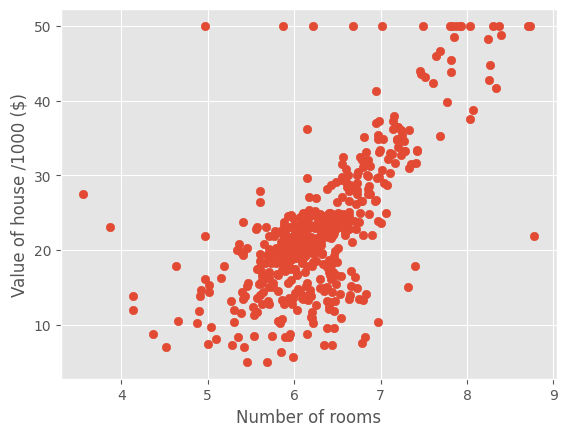

In [23]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)


LinearRegression()

In [35]:
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)

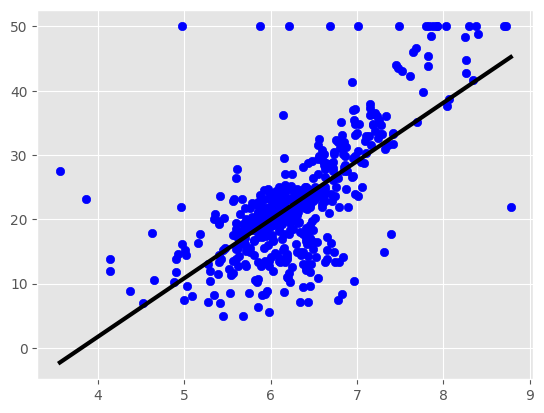

In [36]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)



TypeError: Singleton array array(<matplotlib.collections.PathCollection object at 0x000002472778F510>,
      dtype=object) cannot be considered a valid collection.

In [40]:
y = dframe['life'].values
X = dframe['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)


In [41]:
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


<AxesSubplot: >

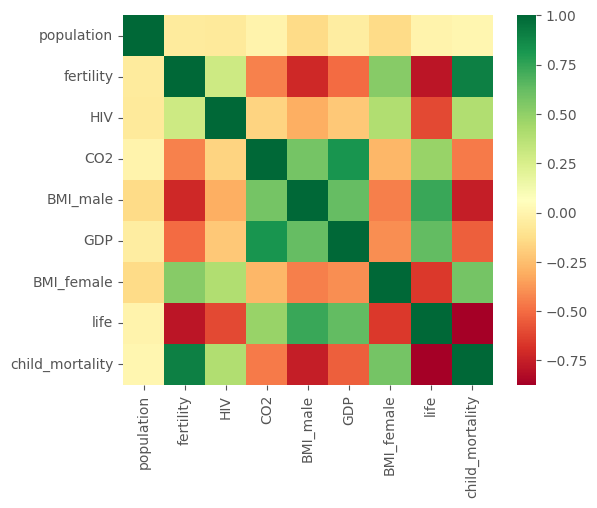

In [45]:
dframe = dframe.drop('Region',axis =1)
sns.heatmap(dframe.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


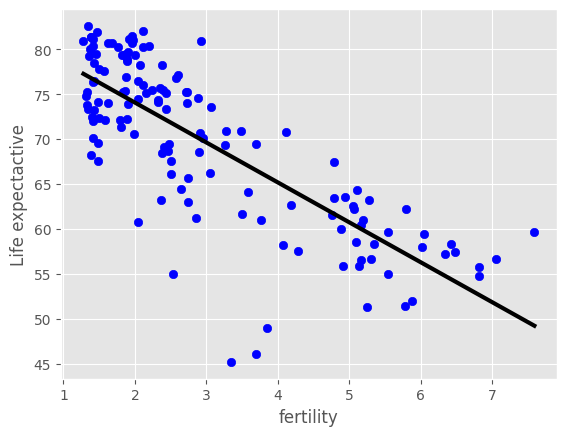

In [49]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_reshaped, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

print(reg.score(X_reshaped, y))

# Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.ylabel('Life expectactive')
plt.xlabel('fertility')
plt.show()

In [48]:
X_fertility = dframe['fertility'].values
X_fertility = X_fertility.reshape(-1, 1)
X_fertility.shape

(139, 1)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = dframe['life'].values
X = dframe.drop(['life'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

1/n * sum( (y_pred - y)^2 )

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430134
Root Mean Squared Error: 3.2476010800369464


In [56]:
reg_all.coef_

array([-2.03205166e-09, -3.30810286e-01, -7.21234146e-01, -1.47522293e-01,
        4.93199538e-01,  1.37767248e-04, -2.52417353e-01, -8.67212952e-02])

In [58]:
print("Intercept:", reg_all.intercept_)


Intercept: 94.03778829995005


[-0.         -0.30409556 -2.33203165 -0.          0.51040194  1.45942351
 -1.02516505 -4.57678764]


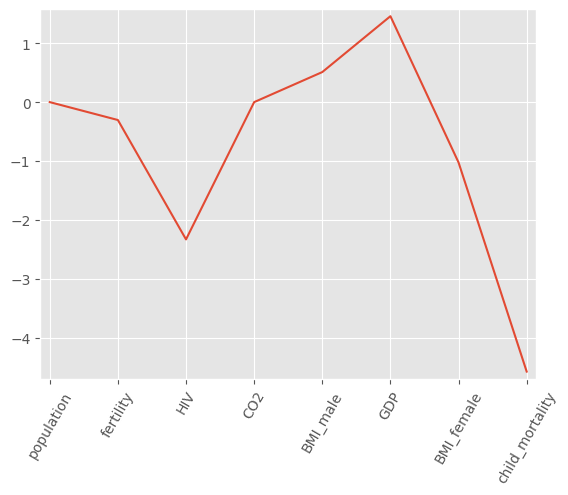

In [66]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')

names = df.drop(['life','Region'], axis=1).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.4)    #, normalize=True)  removed

lasso.fit(X_scaled, y)
lasso_coef = lasso.fit(X_scaled, y).coef_
print(lasso_coef)

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.margins(0.02)
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()
# [1,...,100]
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793505


In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782622253
0.8436128620131319


In [70]:

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/diabetes.csv')
df.head(3)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [71]:
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values
     

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred)) # Matriz de confusión
print(classification_report(y_test, y_pred)) # Informes de clasificación

# support is the number of actual occurrences of the class in the specified dataset.

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



In [75]:
# from sklearn.metrics import  roc_curve

# # Compute predicted probabilities: y_pred_prob
# y_pred_prob = logreg.predict_proba(X_test)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# print(fpr,tpr)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr, label='Logistic Regression')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

In [80]:
df = pd.read_csv('C:/Users/PC/Downloads/CC GENERAL.csv')
print(df.head()) 


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [83]:
X = df.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [102]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


            0         1         2         3         4         5         6   \
0    -0.312038 -0.106331 -0.181129 -0.152156 -0.148808 -0.198985 -0.343796   
1     0.219928  0.037539 -0.131224 -0.099751 -0.127038  0.728177 -0.341439   
2     0.126684  0.146785 -0.030505  0.030851 -0.128792 -0.132251  0.359775   
3     0.020571 -0.426063  0.097223  0.228832 -0.190449 -0.154451 -0.424878   
4    -0.151630  0.218959 -0.195282 -0.146778 -0.192118 -0.197278 -0.428601   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.146906  0.103137 -0.066350 -0.071056 -0.026406 -0.092925  0.252792   
8946 -0.151150  0.105477 -0.067009 -0.072668 -0.025006 -0.095033  0.258527   
8947 -0.156989 -0.039327 -0.085230 -0.075682 -0.062527 -0.098974  0.181198   
8948 -0.154334 -0.038414 -0.097250 -0.073925 -0.094148 -0.093066 -0.253040   
8949 -0.115217 -0.178896  0.008481  0.060716 -0.091472 -0.081739  0.088400   

            7         8         9         10        11        1

In [86]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


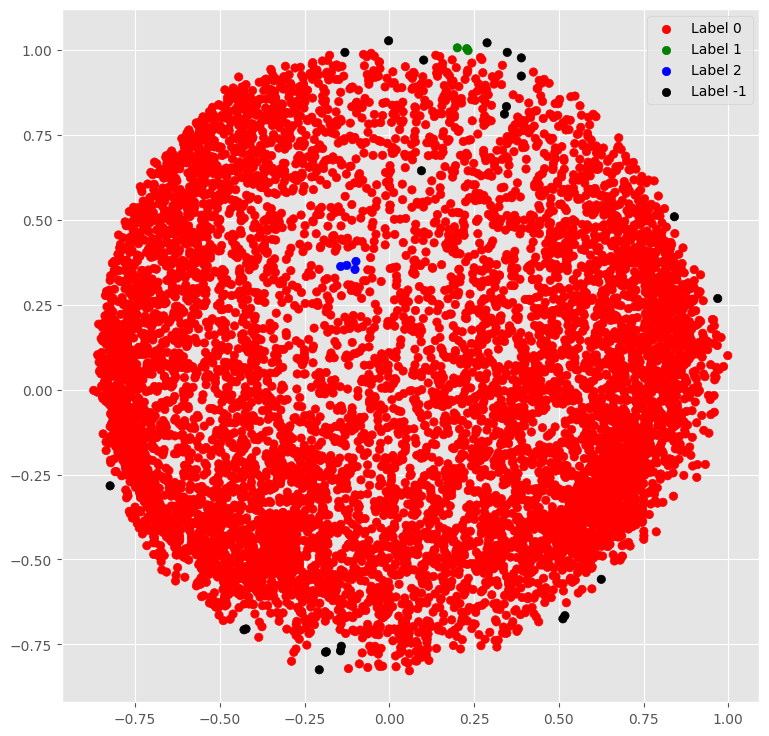

In [96]:
from sklearn.cluster import DBSCAN 

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
colours = {0: 'r', 1: 'g', 2: 'b', -1: 'k'}

# For the construction of the legend of the plot 
# r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
# g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
# b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
# k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 


# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colours.values()]
labels = [f'Label {label}' for label in colours.keys()]
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

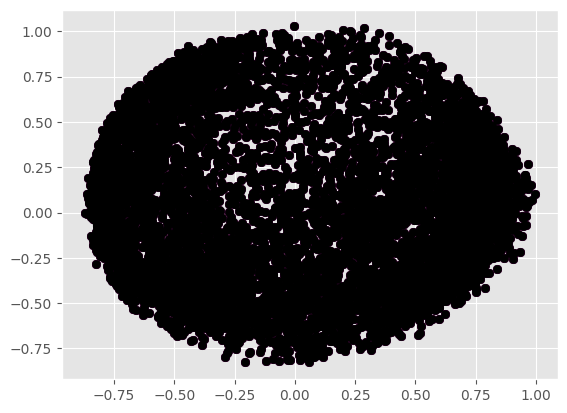

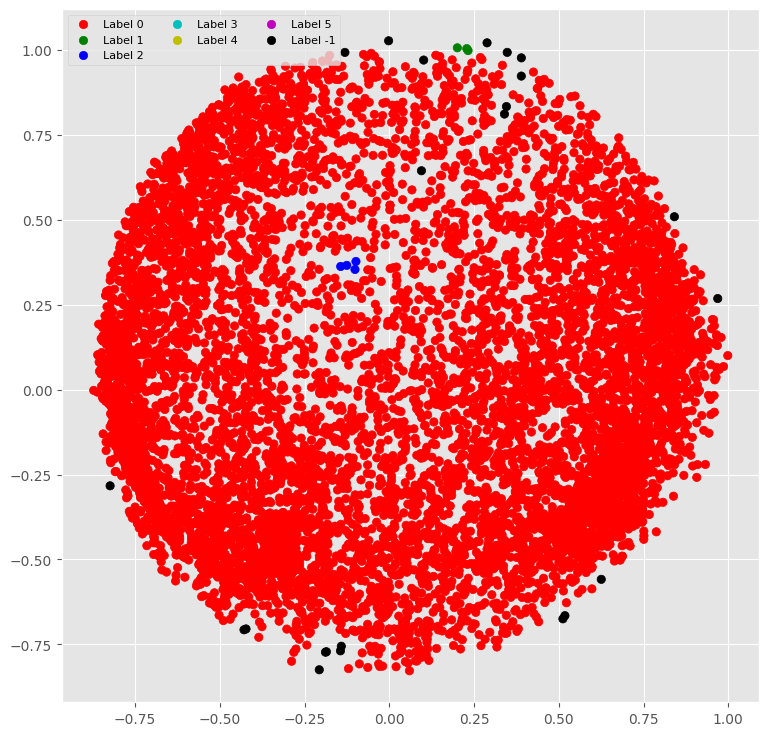

In [94]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_ 

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 

In [3]:
iris = datasets.load_iris()
print(type(iris))


print(iris.keys())
# DESCR :> Descripcion del conjunto de datos

print(type(iris.data), type(iris.target))
     

print(iris.data.shape)


iris.target_names
# 0 - setosa || 1 - versicolor || 2 - virginica
     

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


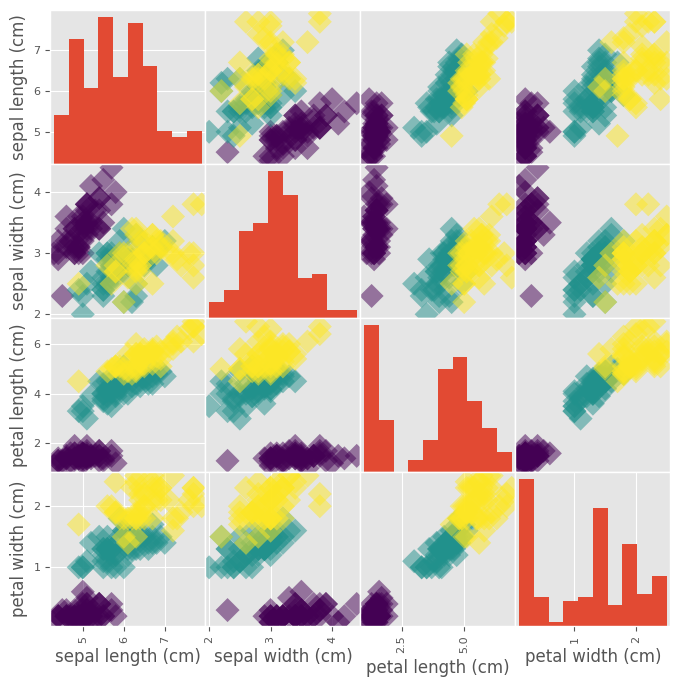

In [6]:
_= pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],
                              s=150, marker = 'D')

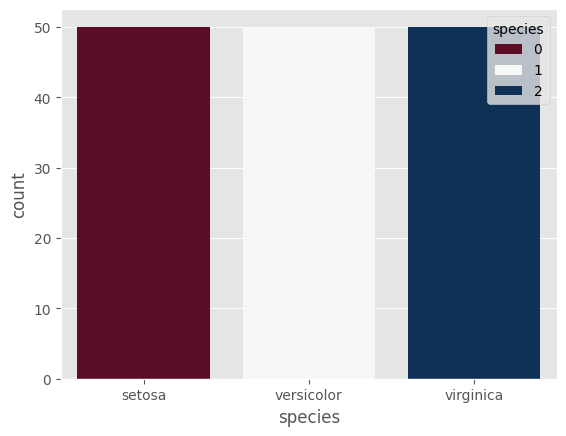

In [9]:
df['species'] = iris.target

plt.figure()
sns.countplot(x='species', hue='species', data=df, palette='RdBu')

# Customizing the x-axis labels
plt.xticks([0,1,2], iris.target_names)

# Show the plot
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # Instanciar nuestro KNeighborsClassifier
knn.fit(iris['data'], iris['target']) # Ajustar a nuestro clasificar el conjunto de entrenamiento y datos etiquetados


KNeighborsClassifier(n_neighbors=6)

In [11]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])
# X_new.shape
prediction = knn.predict(X_new) # Usar el metodo de clasificador 
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, 
                                                    stratify=y) 

knn = KNeighborsClassifier(n_neighbors=8)   # if labeled data

kmeanModel = KMeans(n_clusters=3)     # if unlabeled data


knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [14]:
knn.score(X_test, y_test)

0.9555555555555556

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


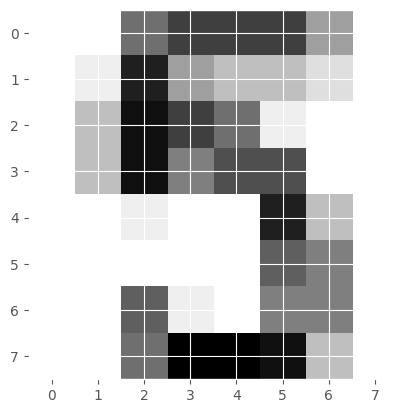

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
# print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


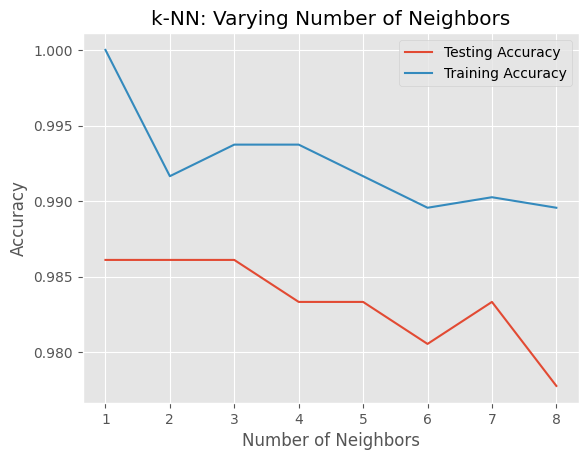

In [17]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()